Importing the Dependencies

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [41]:
# Loading the data from CSV file to pandas dataframe
car_dataset = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')


In [42]:
#Inspecting the first five rows of dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
# Checking the number of rows and columns 
car_dataset.shape

(301, 9)

In [44]:
# Getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding Categorical Data

In [46]:
# Encoding "Fuel_type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


In [47]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training data and Test data

In [48]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

Splitting the data and target

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, random_state=2)

## Model Training

### 1. Linear Regression

In [50]:
# Loading the linear regression model

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [51]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [52]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error:", error_score)

R Squared Error: 0.8799451660493711


### Visualize the Actual Prices and Predicted prices

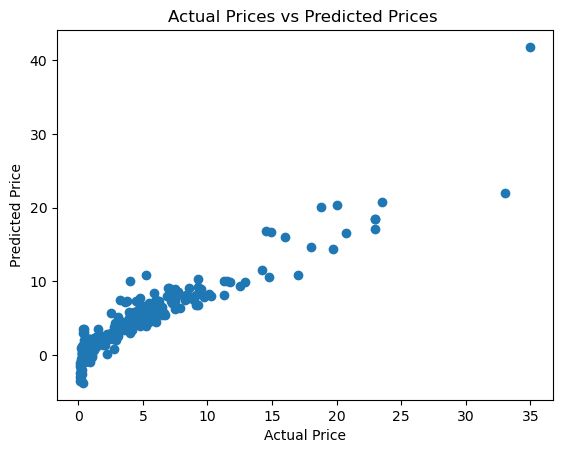

In [53]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()

In [54]:
# Predicting on test data
test_data_prediction = lin_reg_model.predict(X_test)
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:", error_score)

R Squared Error: 0.8365766715027051


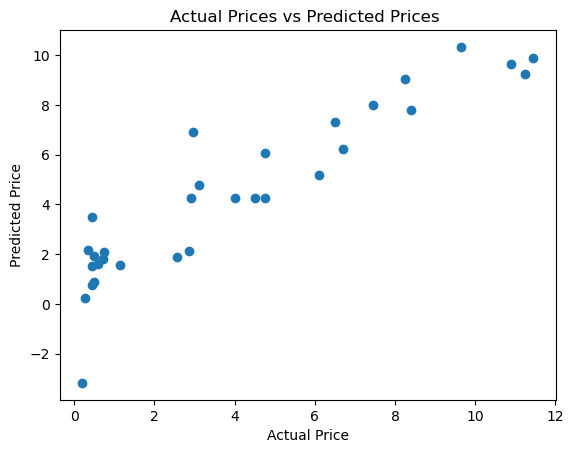

In [55]:
# Visualize the Actual Prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()

## 2. Lasso Regression

In [56]:
# Loading the lasso regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

### Model Evaluation

In [57]:
# Prediction on Training Data

training_data_prediction = lasso_reg_model.predict(X_train)

In [58]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error:", error_score)

R Squared Error: 0.8427856123435794


### Visualize the Actual Prices and Predicted prices

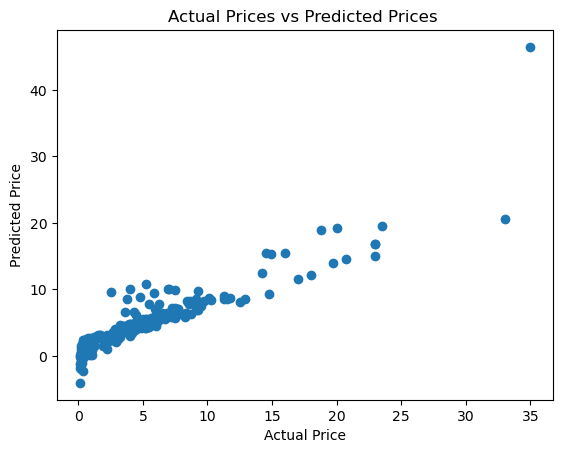

In [59]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()

In [60]:
test_data_prediction = lasso_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:", error_score)

R Squared Error: 0.8709167941173195


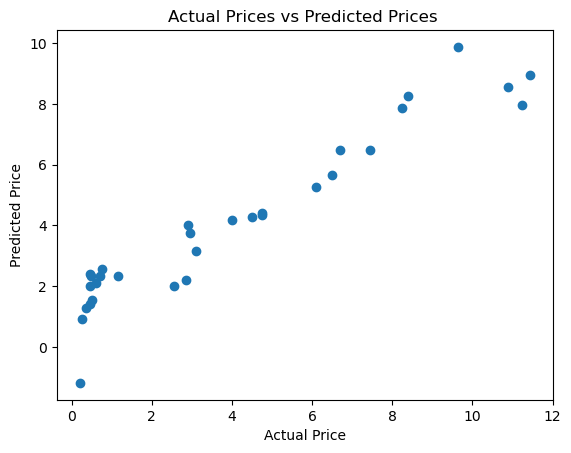

In [61]:
# Visualize the Actual Prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices ")
plt.show()